In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the csv file
df=pd.read_csv("C:\\Users\\Amit\\Downloads\\Analyze-AB-Test-Results-master\\Analyze-AB-Test-Results-master\\ab_data.csv")

In [4]:
df.shape[0]

294478

In [5]:
df['user_id'].nunique()

290584

Checking Data mismatch
Checking mismatch b/w group and landing page

In [40]:
df2 = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')")
df2.shape[0]

3893

Dropping rows having mismatch

In [6]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [7]:
df.drop_duplicates(subset ="user_id", keep = "first", inplace = True)

In [8]:
df.shape[0]

290584

Creating a clean csv file

In [9]:
df.to_csv('clean_data.csv',index= False)

Probability of converting regradless of the group

In [10]:
df[df['converted']==1].count()/df.count()

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

In [11]:
df2=df[df['group']=='control']

Probability of converting given group is control

In [12]:
df2[df2['converted']==1].count()/df2.count()

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

Probability of converting given group is treatment

In [13]:
df3=df[df['group']=='treatment']
df3[df3['converted']==1].count()/df3.count()

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

Evidence that one page leads to more conversions?

Given that an individual was in the treatment group, the probability they have converted is 0.118807

Given that an individual was in the control group, the probability they have converted is 0.120386
we are able to find that old page does better , but by a very small margin.

So,we cannot state that one page leads to more conversions.This is very important as both pages show similar performance

A/B Test

Hypothesis

Null Hypothesis: pnew<=pold
Alternate Hypotnesis: pnew>pold

convert rate for new

In [14]:
p_new = df['converted'].mean()
print(p_new)

0.11959708724499628


convert rate for old

In [15]:
p_old = df['converted'].mean()
print(p_old)

0.11959708724499628


Total records for new

In [16]:
n_new = len(df.query("group == 'treatment'"))
print(n_new)

145310


Total Records for old

In [17]:
n_old= len(df.query("group == 'control'"))
print(n_new)

145310


Simulate nnew transactions with a convert rate of pnew under the null. Store these nnew 1's and 0's in new_page_converted.

In [18]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17435

Simulate nnew transactions with a convert rate of pnew under the null. Store these nnew 1's and 0's in new_page_converted.

In [19]:
old_page_converted = np.random.binomial(n_old,p_old)
new_page_converted

17435

Simulate 10,000 pnew - pold values using this same process similarly to the one you calculated in parts a. through g. above. Store all 10,000 values in p_diffs.

In [20]:
p_diffs = []

for i in range(10000):
    new_converted_simulation = np.random.binomial(n_new,p_new)/n_new
    old_converted_simulation = np.random.binomial(n_old,p_old)/n_old
    diff = new_converted_simulation - old_converted_simulation 
    p_diffs.append(diff)

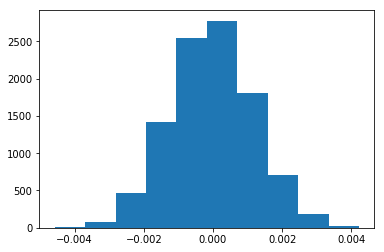

In [21]:
plt.hist(p_diffs);

In [22]:

# Calculate the actucl difference observed in ab_data

org_old_mean = df.query('group =="control"').converted.mean()
org_new_mean = df.query('group =="treatment"').converted.mean()
org_diff = org_new_mean - org_old_mean

# Convert p_diffs to array

p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > org_diff).mean()

0.9045

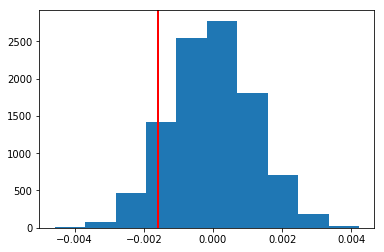

In [23]:
plt.hist(p_diffs);
plt.axvline(org_diff,c='r',linewidth = 2);

The above represents the p-value of observing the statistic given the Null is true. As the p-value is large enough, we would fail to reject the Null hypothesis and keep the old page.

Regression Analysis


In [24]:
df['intercept']=1

df[['control', 'treatment']] = pd.get_dummies(df['group'])


In [25]:
import statsmodels.api as sm

logit = sm.Logit(df['converted'],df[['intercept','treatment']])

In [26]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        08:13:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

p-value=0.19. Hence we cannot reject null hypothesis

In [27]:
countries_df = pd.read_csv("C:\\Users\\Amit\\Downloads\\Analyze-AB-Test-Results-master\\Analyze-AB-Test-Results-master\\countries.csv")
df_new = countries_df.set_index('user_id').join(df.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [28]:
### Create the necessary dummy variables

df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

In [29]:
log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                 -0.2214
Time:                        08:14:01   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""


Looking at the results above, we may conclude there is no significant effect on the convertion based on the country.